In [2]:
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone4.csv')
df.head()

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
0,41.0,190.0,190.000000,7.4,67,5,1,41.00000,0
1,36.0,118.0,118.000000,8.0,72,5,2,36.00000,0
2,12.0,149.0,149.000000,12.6,74,5,3,12.00000,0
3,18.0,313.0,313.000000,11.5,62,5,4,18.00000,0
4,NaN,NaN,185.931507,14.3,56,5,5,42.12931,0


In [3]:
df['Result'].value_counts() #0,1 카운트

0    109
1     44
Name: Result, dtype: int64

In [4]:
cols=['Solar.R2','Wind','Temp']
X=df[cols] #독립변수
y=df['Result'] #종속변수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001296BDC5348>,
      dtype=object)

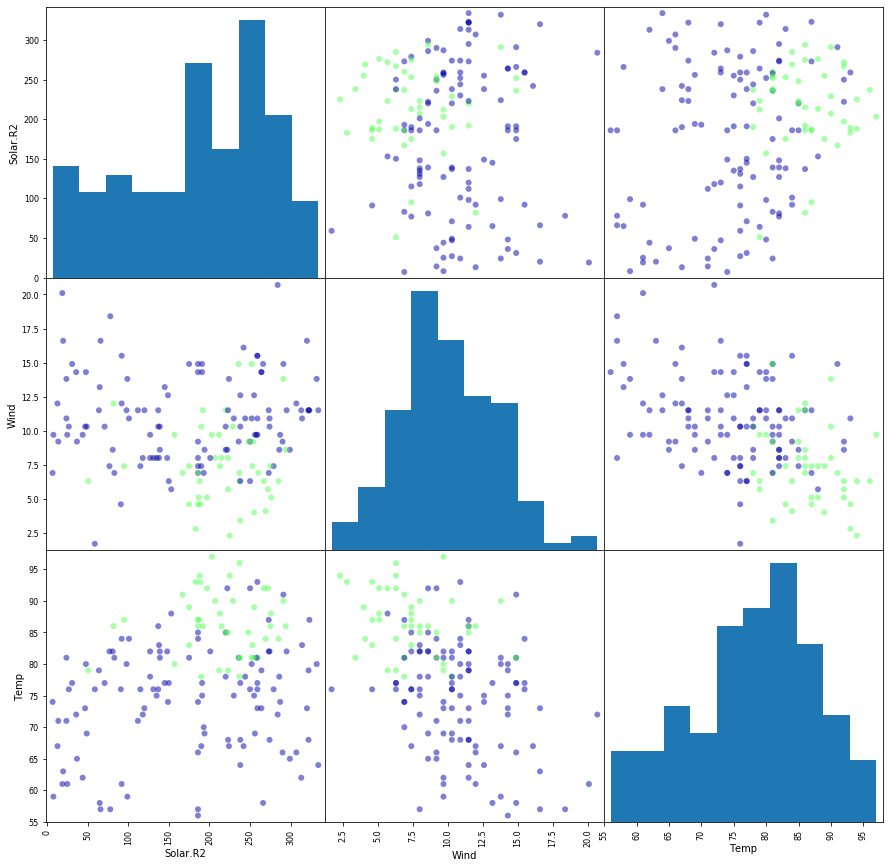

In [8]:
import mglearn
#산점도 행렬 그래프
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)

In [14]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [33]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [34]:
df_samp['Result'].value_counts() #0,1 카운트(샘플링 후)

1    44
0    44
Name: Result, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=10)

[1.0, 0.8770491803278688, 0.8770491803278688, 0.8360655737704918, 0.860655737704918, 0.8442622950819673, 0.8442622950819673, 0.8278688524590164, 0.8360655737704918, 0.8360655737704918]
[0.6451612903225806, 0.7419354838709677, 0.7741935483870968, 0.8064516129032258, 0.8064516129032258, 0.7096774193548387, 0.7741935483870968, 0.6774193548387096, 0.7096774193548387, 0.7419354838709677]


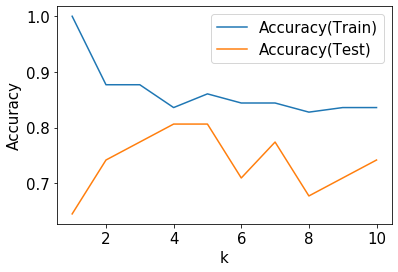

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
#최적의 이웃(k)의 갯수를 구하는 코드
from sklearn.neighbors import KNeighborsClassifier
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11) #1~10
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) #이웃의 갯수 설정
    knn.fit(X_train,y_train) #기계학습
    train_rate.append(knn.score(X_train,y_train)) #학습용 정확도
    test_rate.append(knn.score(X_test,y_test)) #검증용 정확도
    
plt.rcParams['font.size']=15 #그래프 폰트 사이즈
plt.plot(neighbors,train_rate,label='Accuracy(Train)')
plt.plot(neighbors,test_rate,label='Accuracy(Test)')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()

print(train_rate)
print(test_rate)

In [37]:
#실험을 통해 얻은 최적의 k값으로 최종 모형 만들기
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
import numpy as np
#score 함수를 이용하는 방법
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
#predict 함수를 이용하는 방법
pred1=model.predict(X_train)
pred2=model.predict(X_test)
print(np.mean(pred1==y_train))
print(np.mean(pred2==y_test))

0.8360655737704918
0.8064516129032258
0.8360655737704918
0.8064516129032258


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred2) #오분류표
#데이터프레임으로 변환
df_cm=pd.DataFrame(cm,index=['부족','충분'],columns=['부족','충분'])
df_cm

,부족,충분
부족,20,2
충분,4,5
